## Predict Round of 16 World Cup 2022 Match

In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import tensorflow as tf

In [2]:
data = "dataset/"
df_internationalmatches = pd.read_csv(data + "Results International Matches.csv")
df_wcmatches = pd.read_csv(data + "Data Predict.csv")

print(df_internationalmatches.shape)
print(df_wcmatches.shape)

(601, 19)
(8, 17)


In [3]:
df_internationalmatches.head()

,date,home_team,away_team,home_att,away_att,home_mid,away_mid,home_def,away_def,home_score,away_score,home_rank,away_rank,home_rankpoint,away_rankpoint,tournament,city,country,neutral
0,2018-09-06,Germany,France,84,82,85,85,85,82,0,0,15,1,1561.0,1726.0,UEFA Nations League,Munich,Germany,False
1,2018-09-06,Wales,Republic of Ireland,82,75,71,74,77,75,4,1,19,29,1536.0,1484.0,UEFA Nations League,Cardiff,Wales,False
2,2018-09-06,Slovenia,Bulgaria,72,70,76,69,72,67,1,2,55,47,1392.0,1416.0,UEFA Nations League,Ljubljana,Slovenia,False
3,2018-09-06,Austria,Sweden,80,76,77,75,75,75,2,0,23,13,1502.0,1565.0,Friendly,Vienna,Austria,False
4,2018-09-06,Netherlands,Peru,79,80,80,77,80,75,2,1,17,20,1540.0,1535.0,Friendly,Amsterdam,Netherlands,False


In [4]:
df_wcmatches.head()

,date,home_team,away_team,home_att,away_att,home_mid,away_mid,home_def,away_def,home_rank,away_rank,home_rankpoint,away_rankpoint,tournament,city,country,neutral
0,2022-12-03,Netherlands,United States,82,77,82,78,83,76,8,16,1694.51,1627.48,FIFA World Cup,Al Rayyan,Qatar,True
1,2022-12-03,Argentina,Australia,86,72,84,72,82,71,3,38,1773.88,1488.72,FIFA World Cup,Al Rayyan,Qatar,True
2,2022-12-04,France,Poland,86,81,82,75,82,75,4,26,1759.78,1548.59,FIFA World Cup,Doha,Qatar,True
3,2022-12-04,England,Senegal,86,79,83,76,83,77,5,18,1728.47,1584.38,FIFA World Cup,Al Khor,Qatar,True
4,2022-12-05,Japan,Croatia,75,80,77,83,76,78,24,12,1559.54,1645.64,FIFA World Cup,Al Wakrah,Qatar,True


In [5]:
label = LabelEncoder()
ohc = OneHotEncoder()
scaler = StandardScaler()

In [6]:
ftr = []
for i in range(len(df_internationalmatches)):
    if df_internationalmatches.home_score[i] > df_internationalmatches.away_score[i]:
        ftr.append(0)
    elif df_internationalmatches.home_score[i] < df_internationalmatches.away_score[i]:
        ftr.append(2)
    else:
        ftr.append(1)
df_internationalmatches.neutral = label.fit_transform(df_internationalmatches.neutral)
df_internationalmatches['FTR'] = ftr

In [7]:
columns = ['FTR', 'home_score', 'away_score', 'home_att', 'away_att', 'home_mid', 'away_mid', 'home_def', 'away_def', 'home_rank', 'away_rank', 'home_rankpoint', 'away_rankpoint', 'neutral']

df_internationalmatches = df_internationalmatches[columns]
df_internationalmatches.head()

,FTR,home_score,away_score,home_att,away_att,home_mid,away_mid,home_def,away_def,home_rank,away_rank,home_rankpoint,away_rankpoint,neutral
0,1,0,0,84,82,85,85,85,82,15,1,1561.0,1726.0,0
1,0,4,1,82,75,71,74,77,75,19,29,1536.0,1484.0,0
2,2,1,2,72,70,76,69,72,67,55,47,1392.0,1416.0,0
3,0,2,0,80,76,77,75,75,75,23,13,1502.0,1565.0,0
4,0,2,1,79,80,80,77,80,75,17,20,1540.0,1535.0,0


In [8]:
y_train_predict = ohc.fit_transform(df_internationalmatches['FTR'].to_numpy().reshape(-1,1)).toarray()
X_train = scaler.fit_transform(df_internationalmatches.iloc[:,3:].astype(float))

In [9]:
df_wcmatches.neutral = label.fit_transform(df_wcmatches.neutral)
X_test = scaler.fit_transform(df_wcmatches[['home_att', 'away_att', 'home_mid', 'away_mid', 'home_def', 'away_def', 'home_rank', 'away_rank', 'home_rankpoint', 'away_rankpoint', 'neutral']].astype(float))

In [10]:
def plot_graph_accuracy(history, accuracy):
    plt.plot(history.history[accuracy])
    plt.xlabel("Epochs")
    plt.ylabel(accuracy)
    plt.show()
    
def plot_graph_loss(history, loss):
    plt.plot(history.history[loss])
    plt.xlabel("Epochs")
    plt.ylabel(loss)
    plt.show()

### Model predict matches in 90 - 120 minutes (Probability Home win, Draw, Away Win)

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_dim=X_train.shape[1], activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.002, l2=0.0005)),
    tf.keras.layers.Dense(10, activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.002, l2=0.0005)),
    tf.keras.layers.Dense(y_train_predict.shape[1], activation='softmax')
])

In [12]:
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])

history = model.fit(X_train, y_train_predict, batch_size=10, epochs=500)

Epoch 1/500
61/61 [==============================] - 1s 5ms/step - loss: 1.3316 - accuracy: 0.4626
Epoch 2/500
61/61 [==============================] - 0s 1ms/step - loss: 1.2617 - accuracy: 0.5258
Epoch 3/500
61/61 [==============================] - 0s 1ms/step - loss: 1.2369 - accuracy: 0.5374
Epoch 4/500
61/61 [==============================] - 0s 2ms/step - loss: 1.2242 - accuracy: 0.5491
Epoch 5/500
61/61 [==============================] - 0s 2ms/step - loss: 1.2152 - accuracy: 0.5441
Epoch 6/500
61/61 [==============================] - 0s 1ms/step - loss: 1.2086 - accuracy: 0.5441
Epoch 7/500
61/61 [==============================] - 0s 1ms/step - loss: 1.2024 - accuracy: 0.5408
Epoch 8/500
61/61 [==============================] - 0s 1ms/step - loss: 1.1981 - accuracy: 0.5391
Epoch 9/500
61/61 [==============================] - 0s 1ms/step - loss: 1.1933 - accuracy: 0.5424
Epoch 10/500
61/61 [==============================] - 0s 1ms/step - loss: 1.1896 - accuracy: 0.5491
Epoch 11/

61/61 [==============================] - 0s 1ms/step - loss: 1.0526 - accuracy: 0.5740
Epoch 83/500
61/61 [==============================] - 0s 1ms/step - loss: 1.0517 - accuracy: 0.5757
Epoch 84/500
61/61 [==============================] - 0s 1ms/step - loss: 1.0504 - accuracy: 0.5740
Epoch 85/500
61/61 [==============================] - 0s 1ms/step - loss: 1.0493 - accuracy: 0.5757
Epoch 86/500
61/61 [==============================] - 0s 1ms/step - loss: 1.0484 - accuracy: 0.5757
Epoch 87/500
61/61 [==============================] - 0s 1ms/step - loss: 1.0473 - accuracy: 0.5774
Epoch 88/500
61/61 [==============================] - 0s 1ms/step - loss: 1.0464 - accuracy: 0.5757
Epoch 89/500
61/61 [==============================] - 0s 1ms/step - loss: 1.0453 - accuracy: 0.5724
Epoch 90/500
61/61 [==============================] - 0s 1ms/step - loss: 1.0438 - accuracy: 0.5757
Epoch 91/500
61/61 [==============================] - 0s 1ms/step - loss: 1.0435 - accuracy: 0.5807
Epoch 92/500


61/61 [==============================] - 0s 1ms/step - loss: 0.9914 - accuracy: 0.5890
Epoch 164/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9889 - accuracy: 0.5674
Epoch 165/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9899 - accuracy: 0.5740
Epoch 166/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9890 - accuracy: 0.5824
Epoch 167/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9890 - accuracy: 0.5857
Epoch 168/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9881 - accuracy: 0.5824
Epoch 169/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9867 - accuracy: 0.5740
Epoch 170/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9866 - accuracy: 0.5840
Epoch 171/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9868 - accuracy: 0.5790
Epoch 172/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9846 - accuracy: 0.5824
Epoc

61/61 [==============================] - 0s 1ms/step - loss: 0.9556 - accuracy: 0.6023
Epoch 244/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9555 - accuracy: 0.5940
Epoch 245/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9557 - accuracy: 0.5807
Epoch 246/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9549 - accuracy: 0.5973
Epoch 247/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9554 - accuracy: 0.6023
Epoch 248/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9543 - accuracy: 0.5907
Epoch 249/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9537 - accuracy: 0.5957
Epoch 250/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9532 - accuracy: 0.5790
Epoch 251/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9532 - accuracy: 0.5907
Epoch 252/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9523 - accuracy: 0.5957
Epoc

61/61 [==============================] - 0s 1ms/step - loss: 0.9359 - accuracy: 0.5990
Epoch 325/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9364 - accuracy: 0.5973
Epoch 326/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9365 - accuracy: 0.6073
Epoch 327/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9345 - accuracy: 0.6106
Epoch 328/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9417 - accuracy: 0.6007
Epoch 329/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9365 - accuracy: 0.5990
Epoch 330/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9355 - accuracy: 0.5990
Epoch 331/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9365 - accuracy: 0.5824: 0s - loss: 0.9351 - accuracy: 0.58
Epoch 332/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9355 - accuracy: 0.5940
Epoch 333/500
61/61 [==============================] - 0s 1ms/step - 

61/61 [==============================] - 0s 2ms/step - loss: 0.9320 - accuracy: 0.6007
Epoch 405/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9263 - accuracy: 0.5923
Epoch 406/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9275 - accuracy: 0.5990
Epoch 407/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9262 - accuracy: 0.5907
Epoch 408/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9260 - accuracy: 0.5923
Epoch 409/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9227 - accuracy: 0.6040
Epoch 410/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9290 - accuracy: 0.5940
Epoch 411/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9245 - accuracy: 0.5990
Epoch 412/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9239 - accuracy: 0.5990
Epoch 413/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9287 - accuracy: 0.5923
Epoc

61/61 [==============================] - 0s 2ms/step - loss: 0.9214 - accuracy: 0.5990
Epoch 486/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9245 - accuracy: 0.5973
Epoch 487/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9205 - accuracy: 0.6023
Epoch 488/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9192 - accuracy: 0.6156
Epoch 489/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9190 - accuracy: 0.6040
Epoch 490/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9222 - accuracy: 0.6023
Epoch 491/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9287 - accuracy: 0.6040
Epoch 492/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9227 - accuracy: 0.5973
Epoch 493/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9176 - accuracy: 0.6007
Epoch 494/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9159 - accuracy: 0.6123
Epoc

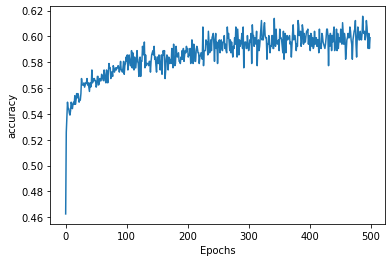

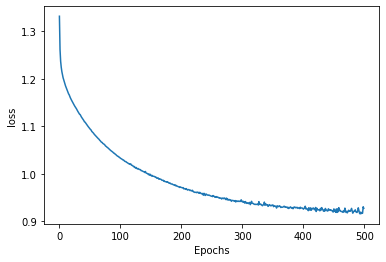

In [13]:
plot_graph_accuracy(history, 'accuracy')
plot_graph_loss(history, 'loss')

In [14]:
prob = model.predict(X_test)
print('Probability Result Round of 16 World Cup 2022 Match in 90 - 120 Minutes')
print('=======================================================================')
for i in range(len(df_wcmatches)):
    print(f'{df_wcmatches.home_team[i]} vs {df_wcmatches.away_team[i]}')
    print(f'Home Win: {prob[i][0]:.5f}  Draw: {prob[i][1]:.5f}  Away Win: {prob[i][2]:.5f}\n')

Probability Result Round of 16 World Cup 2022 Match in 90 - 120 Minutes
Netherlands vs United States
Home Win: 0.48503  Draw: 0.36790  Away Win: 0.14706

Argentina vs Australia
Home Win: 0.79799  Draw: 0.15878  Away Win: 0.04323

France vs Poland
Home Win: 0.48800  Draw: 0.17713  Away Win: 0.33487

England vs Senegal
Home Win: 0.46874  Draw: 0.35900  Away Win: 0.17226

Japan vs Croatia
Home Win: 0.05156  Draw: 0.32959  Away Win: 0.61885

Brazil vs South Korea
Home Win: 0.69430  Draw: 0.20597  Away Win: 0.09973

Morocco vs Spain
Home Win: 0.08009  Draw: 0.01963  Away Win: 0.90029

Portugal vs Switzerland
Home Win: 0.53183  Draw: 0.30390  Away Win: 0.16427

